In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os 

In [2]:
load_dotenv()

model = ChatGroq(model_name = 'openai/gpt-oss-20b', api_key = os.getenv("GROQ_API_KEY"))

In [3]:
class BatsmanState(TypedDict):
    runs  : int 
    balls : int
    fours : int 
    sixes : int 

    sr : float 
    bpb : float 
    boundry_percent : float 
    summary : str
    

In [33]:
def calculate_sr(state : BatsmanState) -> BatsmanState:
    """ This function calculate the strike rate """
    sr = (state['runs']/state['balls'])*100

    # state['sr'] = sr
    
    return {'sr':sr}

In [34]:
def calculate_bpb(state : BatsmanState) -> BatsmanState:
    """This function calculate the balls per boundry """
    bpb = state['balls'] / (state['fours'] + state['sixes'])

    # state['bpb'] = bpb

    return {'bpb':bpb}
    

In [35]:
def calculate_boundry_percentage(state : BatsmanState) -> BatsmanState :
    boundry_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/ state['runs'] * 100)
    
    # state['boundry_percent'] = boundry_percent
    
    return {'boundry_percent':boundry_percent}


In [36]:
def summary(state : BatsmanState) -> BatsmanState:
    summary = f""" 
                strike rate - {state['sr']} \n
                Boundry percentage - {state['boundry_percent']} \n
                Balls Per Boundry - {state['bpb']}
               """
    # state['summary'] = summary 

    return {'summary':summary}


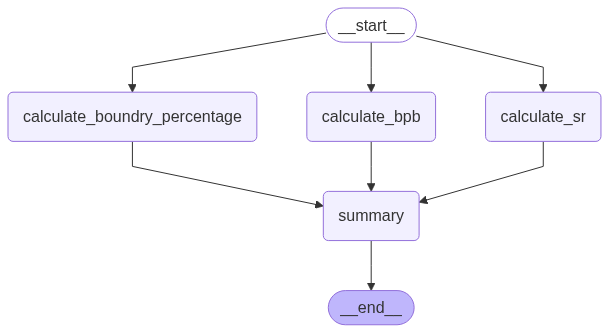

In [39]:
graph = StateGraph(BatsmanState)

# add a nodes
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundry_percentage', calculate_boundry_percentage)
graph.add_node('summary', summary)

# create edges 
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundry_percentage')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundry_percentage', 'summary')

graph.add_edge('summary', END)

graph.compile()



In [40]:
workflow = graph.compile()

In [41]:
initial_state = {
                 'runs':100,
                 'balls':50, 
                 'fours':6, 
                 'sixes':4
                }

response = workflow.invoke(initial_state)
print(response)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundry_percent': 48.0}
